In [12]:
# Netflix Titles – Exploratory Data Analysis (EDA)

A deep dive into Netflix Movies and TV Shows dataset to uncover content trends, popular countries, rating distributions, and more.

---

### Objectives:
- Compare Movies vs TV Shows
- Identify top content-producing countries
- Discover content trends by year
- Analyze rating and genre distribution

### Dataset:
[Kaggle – Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)


SyntaxError: invalid character '–' (U+2013) (<ipython-input-12-0a8329851efd>, line 14)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Google Colab
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [15]:
# Load dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
# Basic info
df.shape
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


np.int64(0)

In [18]:
# Data cleaning
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')

# Convert date
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


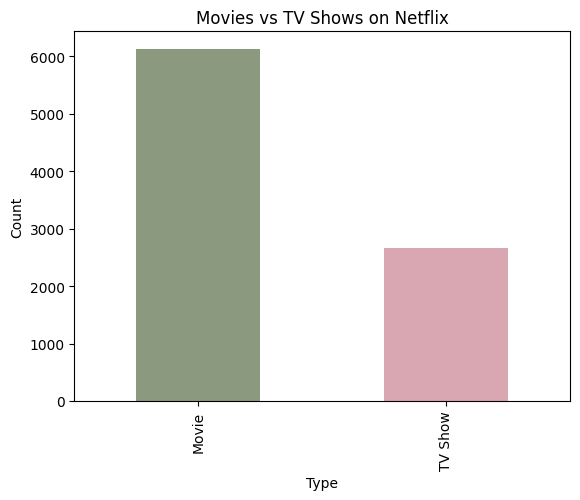

In [20]:
# Movies vs TV Shows
df['type'].value_counts().plot(kind='bar', color=['#8B9A7F', '#D8A7B1'])
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


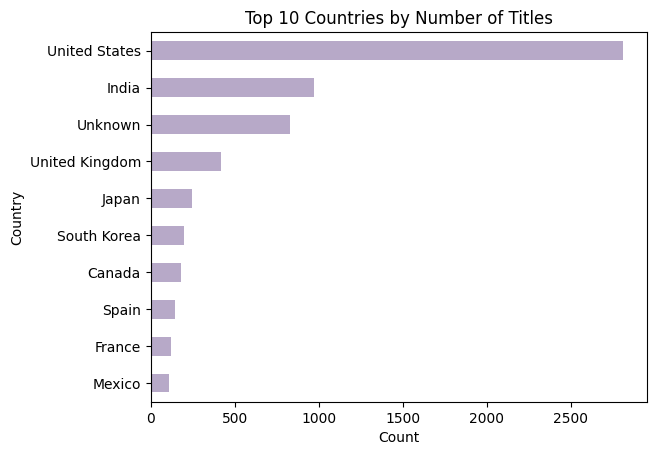

In [23]:
#Top 10 Content-Producing Countries

df['country'].value_counts().head(10).plot(kind='barh', color='#B7A9C8')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()

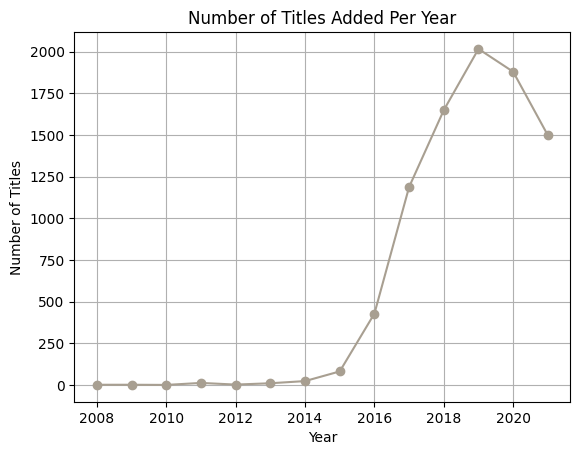

In [24]:
#Content Added Over the Years
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='#A89F91')
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

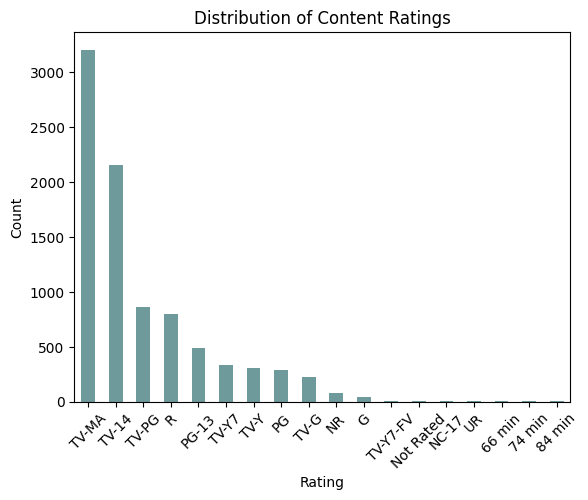

In [25]:
#Content Rating Distribution
df['rating'].value_counts().plot(kind='bar', color='#6E9A9C')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


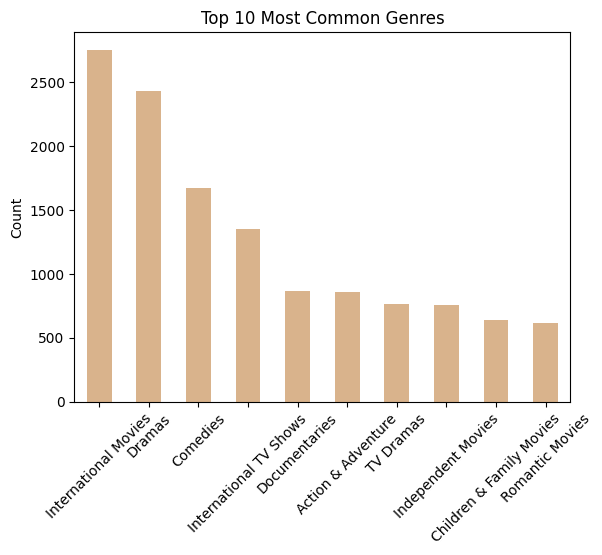

In [26]:
#Most Common Genres
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
genres.plot(kind='bar', color='#D9B38C')
plt.title('Top 10 Most Common Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Key Insights

- **Movies outnumber TV Shows** on Netflix, indicating a focus on single-production content.
- **United States is the top content-producing country**, followed by India and the UK.
- **Content has increased significantly since 2015**, especially in 2018–2020.
- **TV-MA is the most common rating**, showing Netflix’s target towards mature audiences.
- **Documentaries, Dramas, and Comedies** are the most popular genres.

---

## Next Steps

To extend this project:
- Compare with other platforms (e.g., Prime Video, Disney+)
- Perform trend forecasting using time-series models
- Apply NLP to analyze movie descriptions or reviews
